In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean
import intervals as invs

# ctrl_files = paths.reversal_ivsa_ctrl
# exp_files = paths.reversal_ivsa_exp

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/50/Reversal/FED000_032124_03.CSV


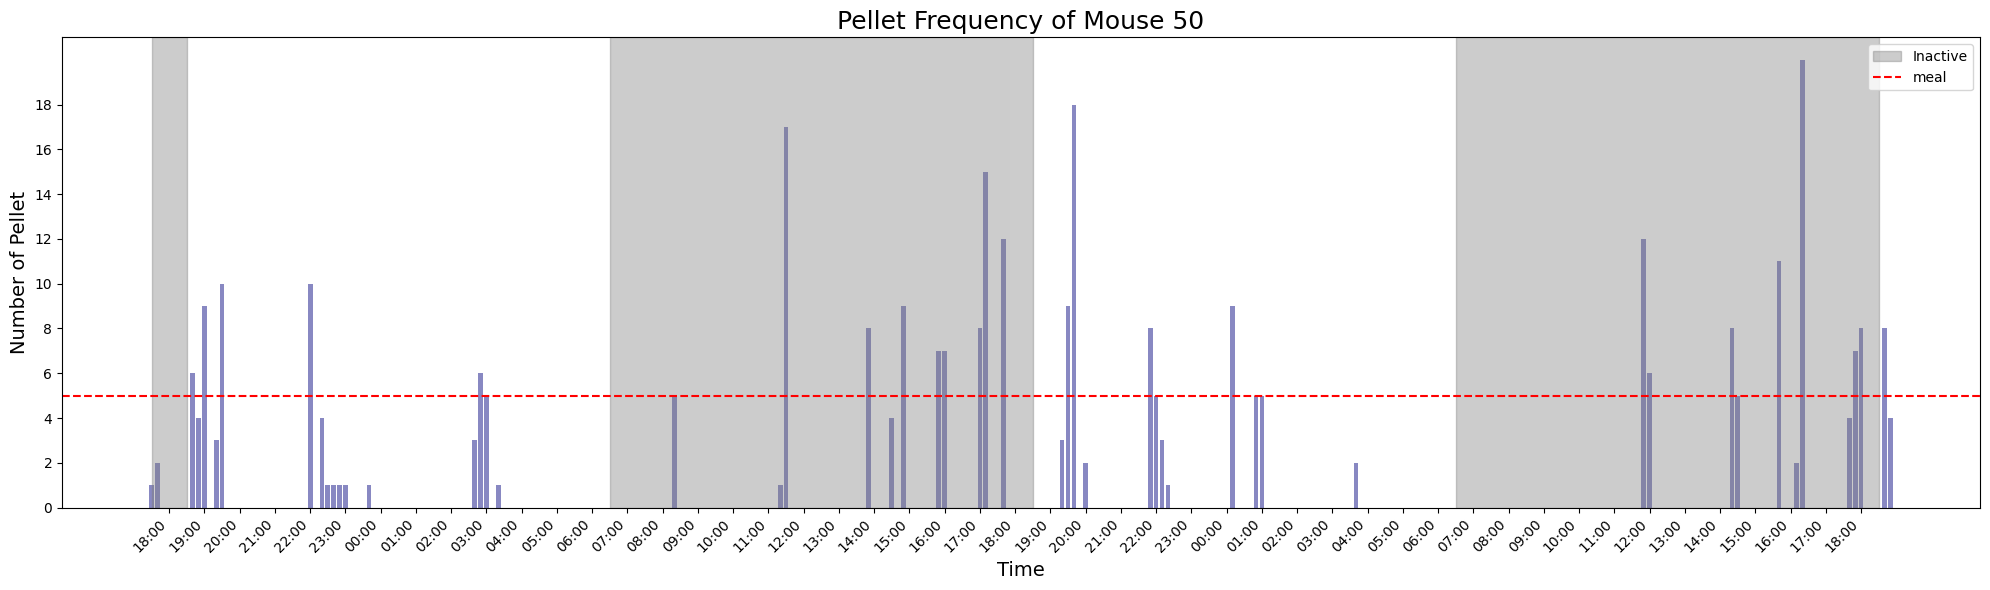

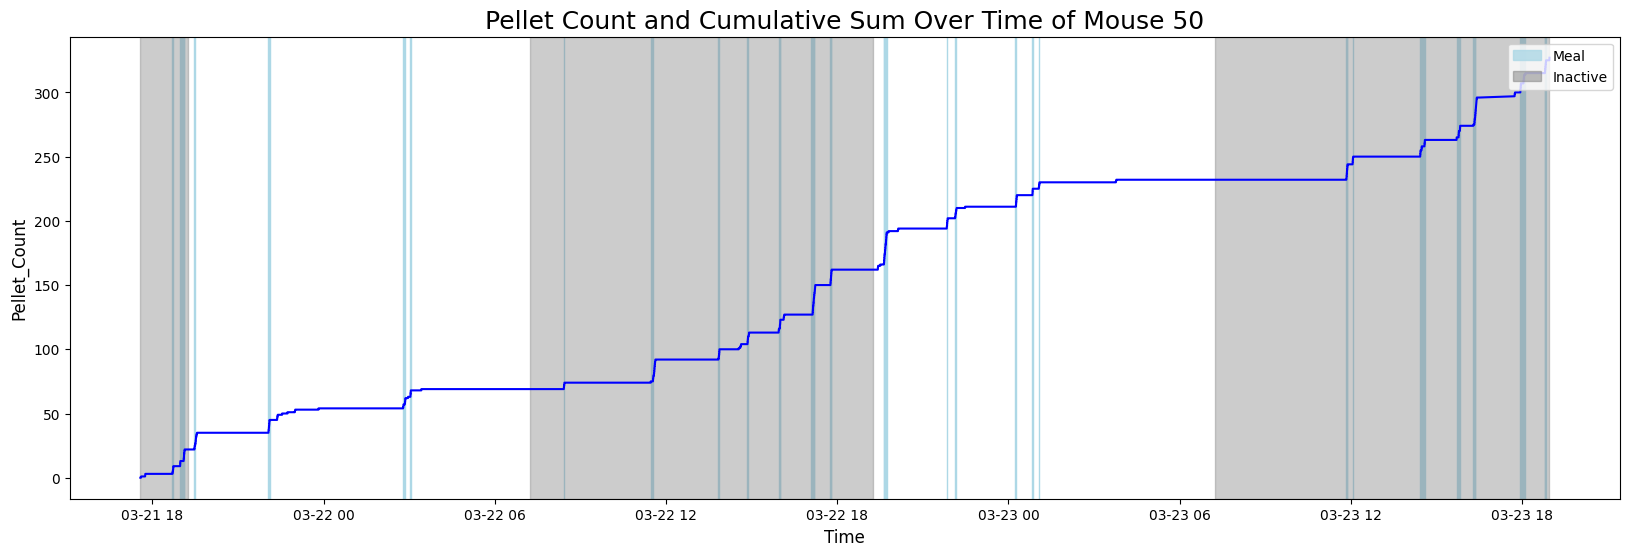

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/51/Reversal/FED000_032124_04.CSV


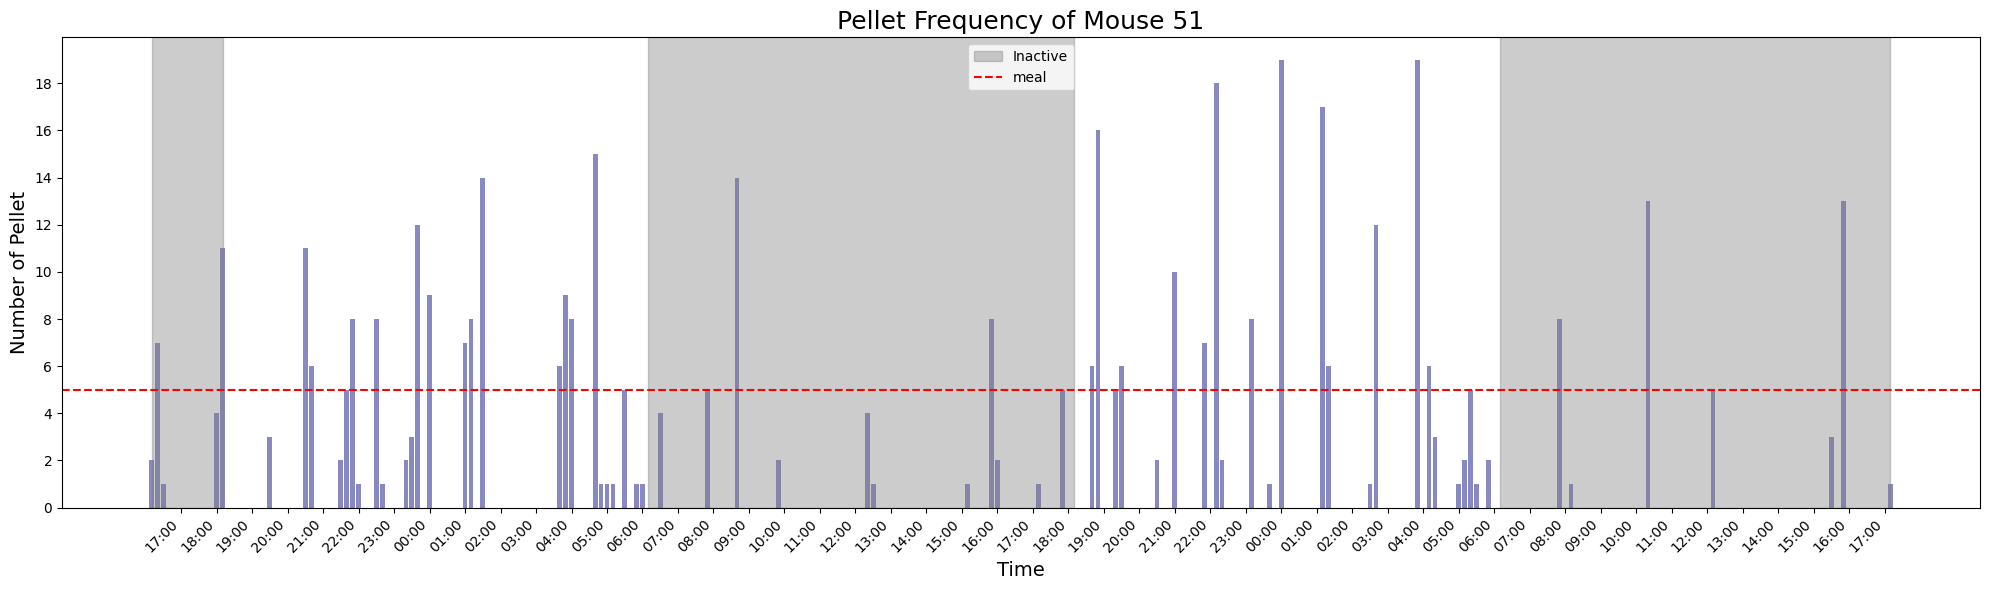

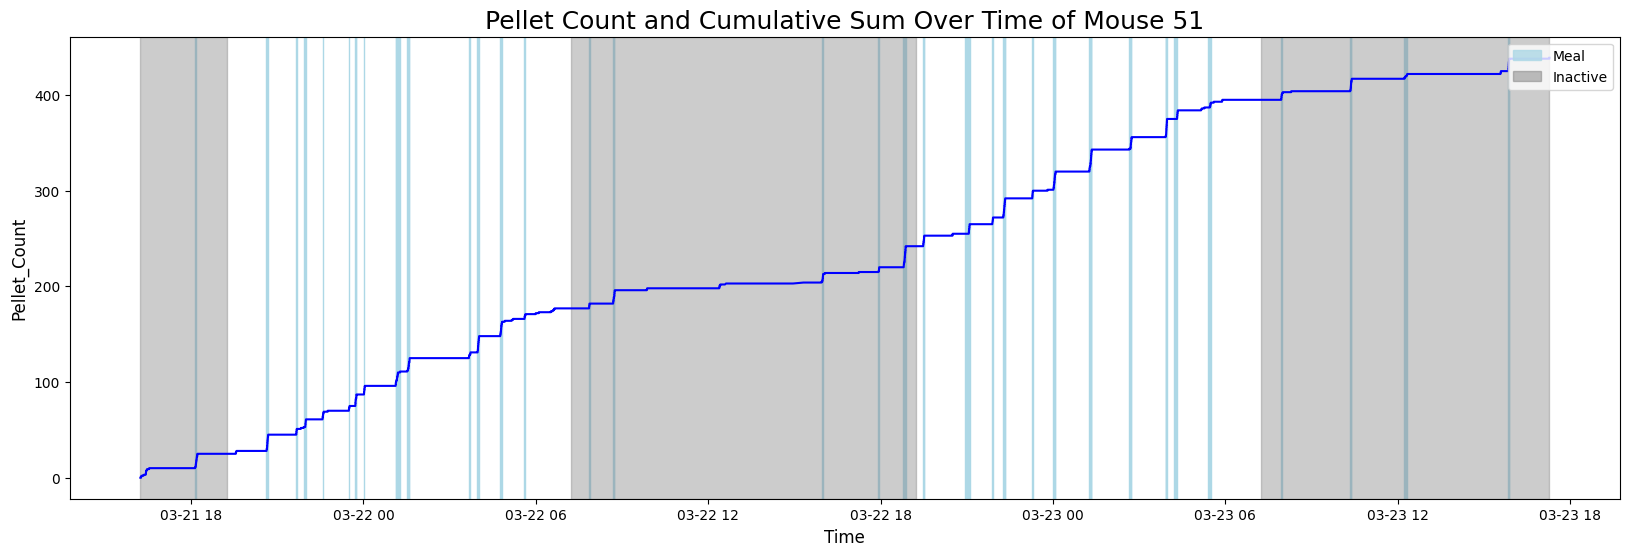

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/45/Reversal/FED000_032124_13.CSV


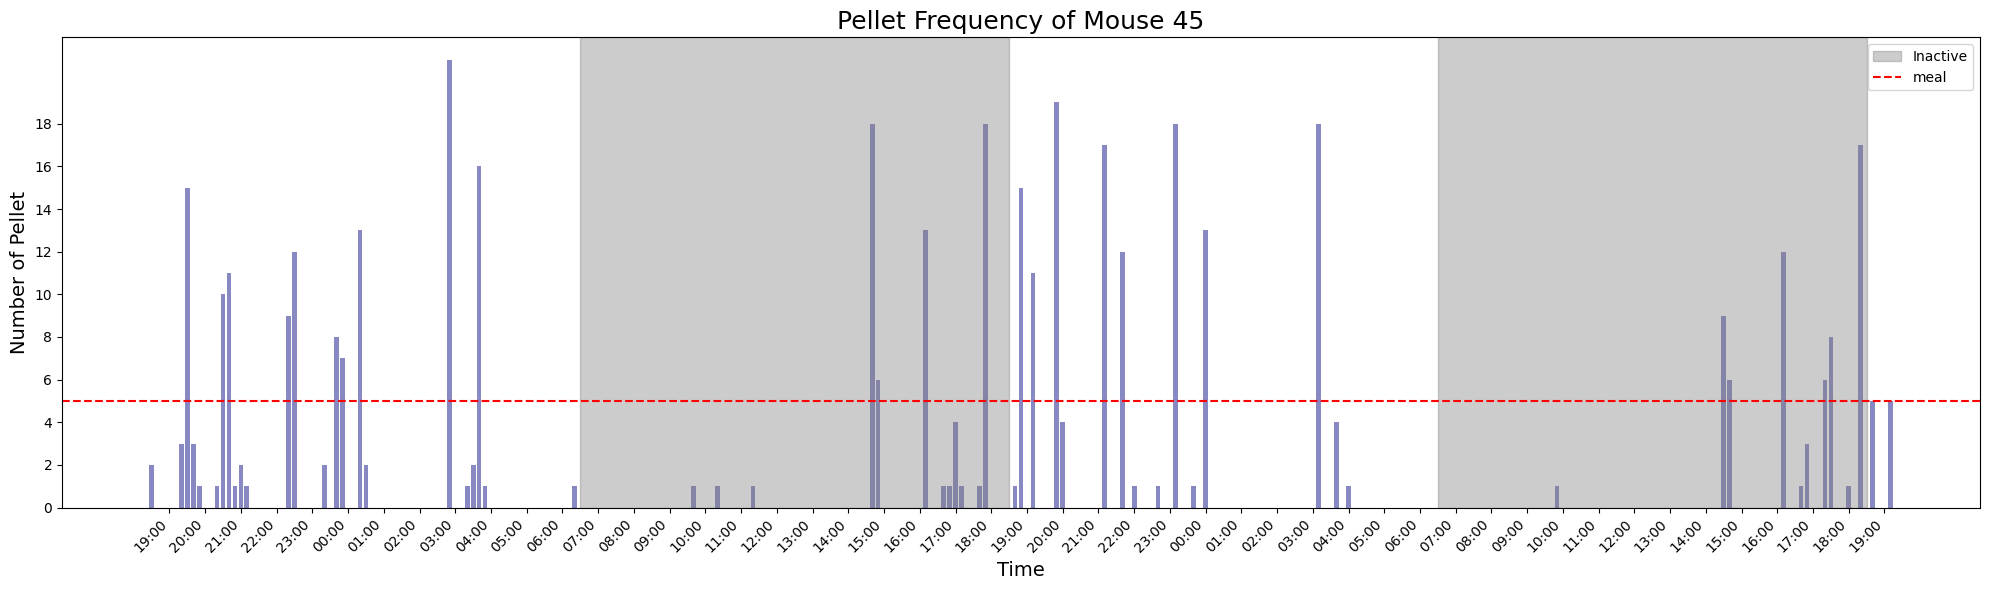

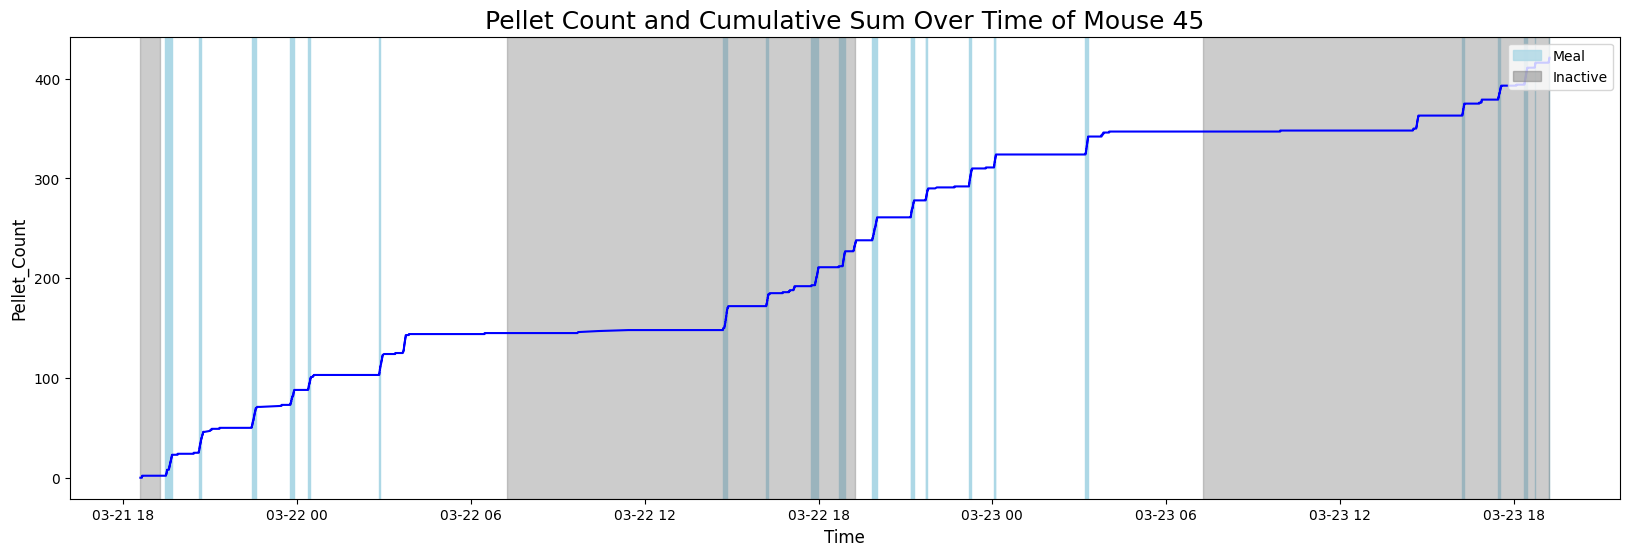

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/44/Reversal/FED000_032124_03.CSV


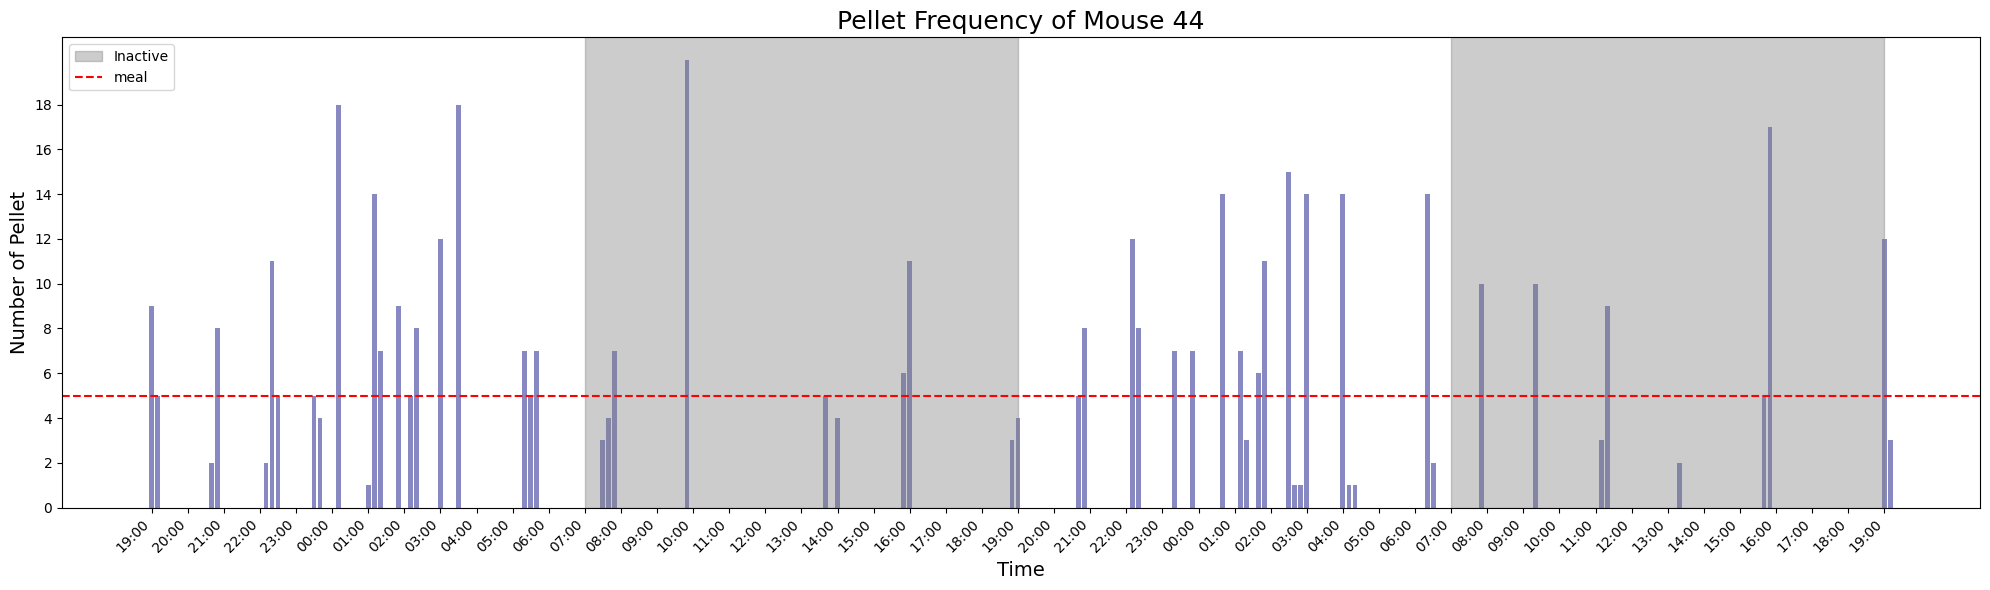

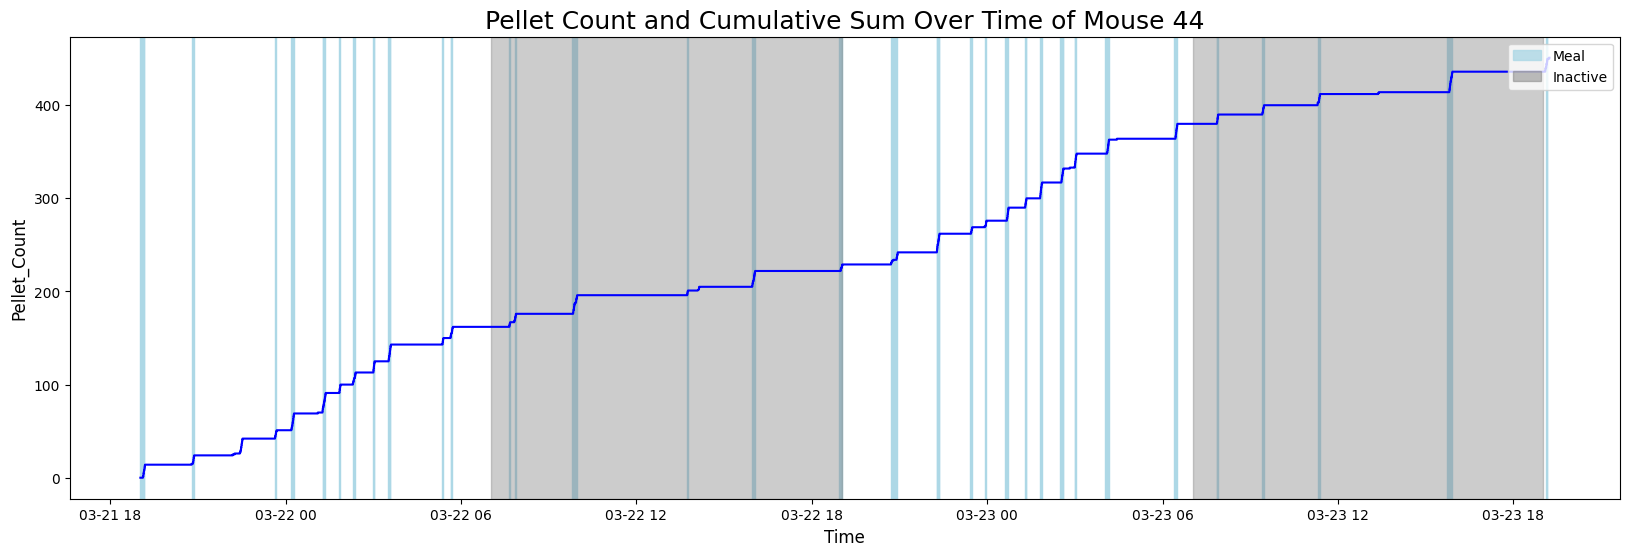

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/53/Reversal/FED000_032124_02.CSV


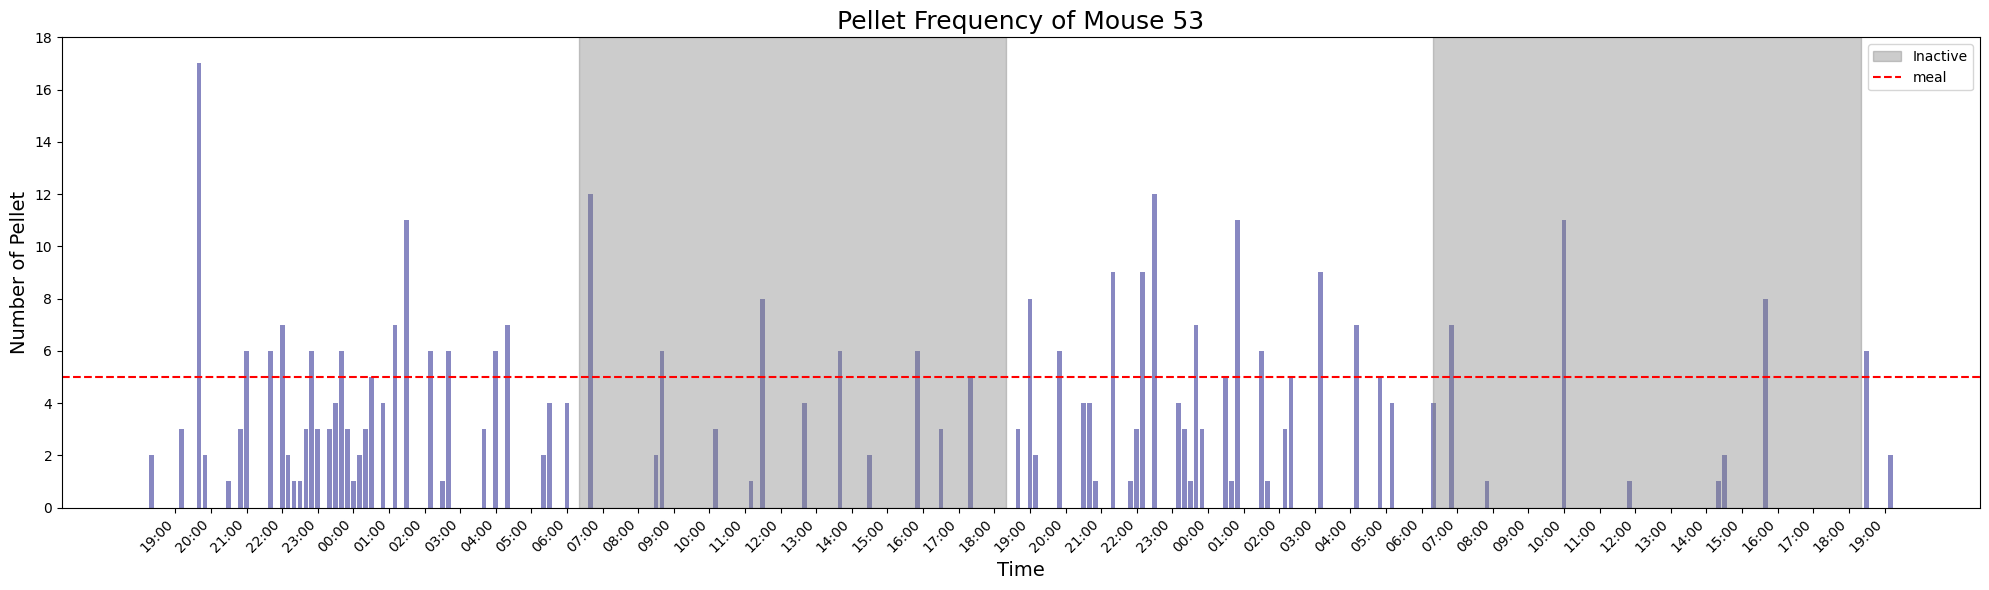

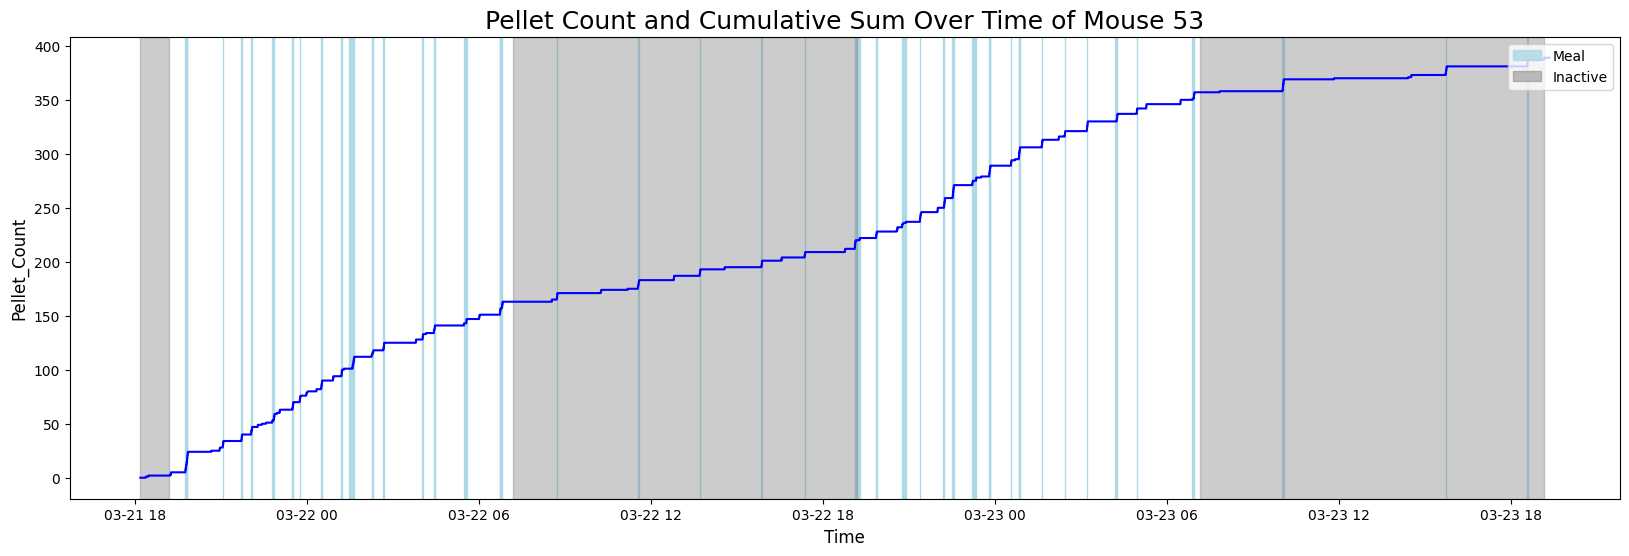

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/41/Reversal/FED000_032124_01.CSV


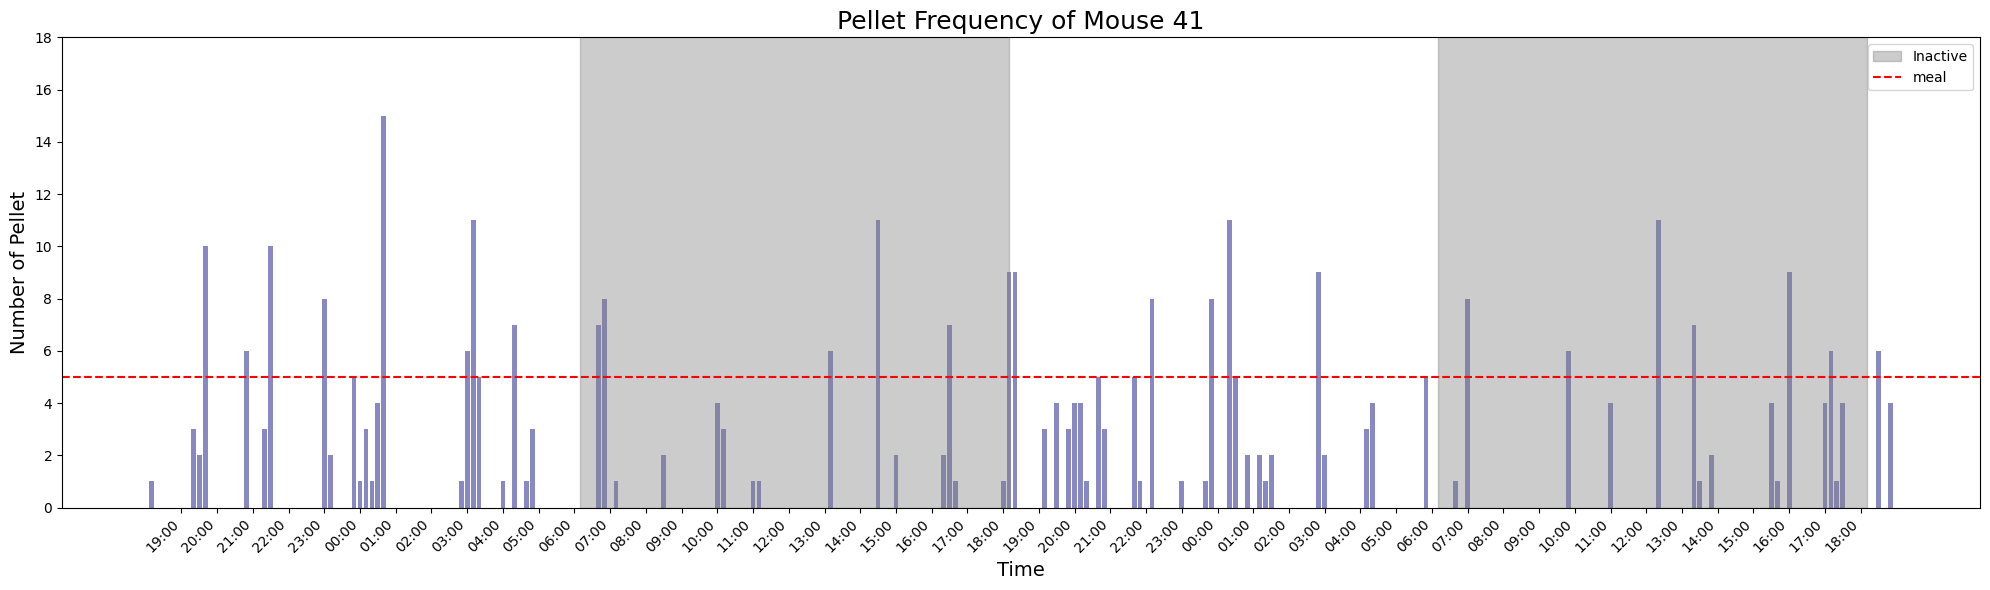

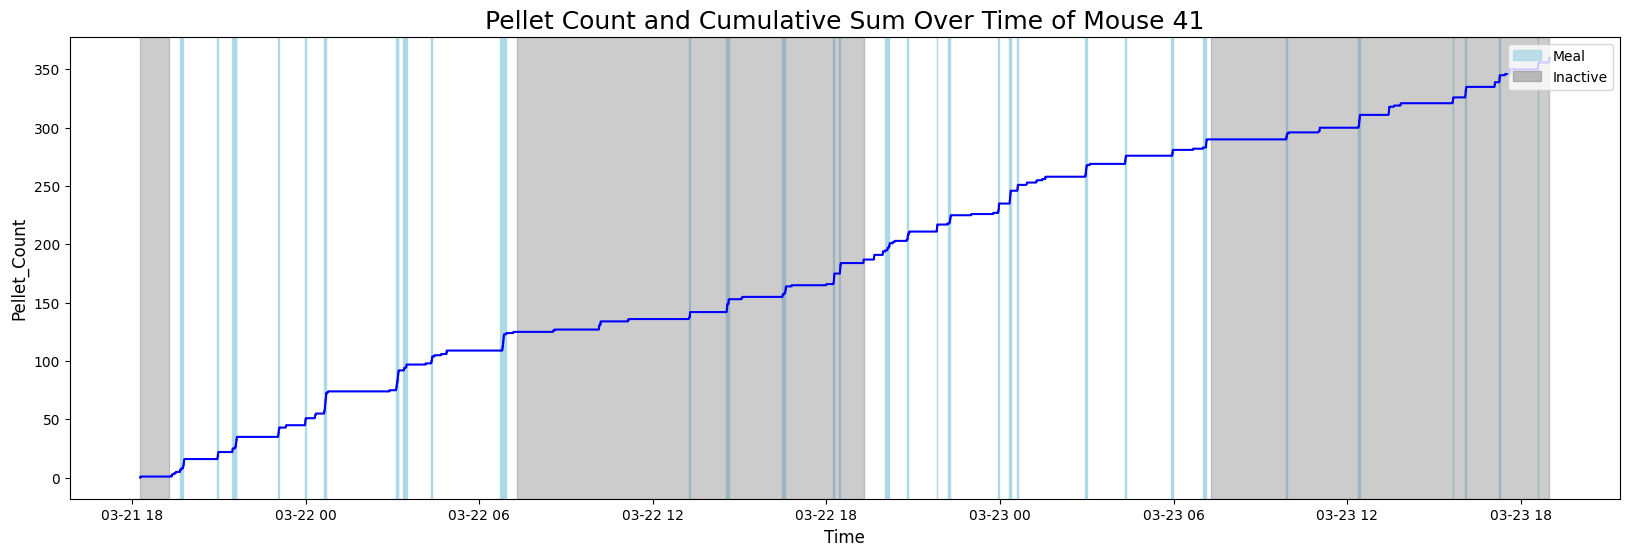

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
ctrl_meal_count = []

for path in paths.reversal_ivsa_ctrl:
    try:
        print(path)
        data = read_csv_clean(path, remove_trivial=False, collect_time=True)
        meal = ml.find_meals(data)
        group = ml.pellet_flip(data)
        num = tl.get_bhv_num(path)[0]
        avg = round(len(meal) / ml.experiment_duration(data), 2)
        ctrl_meal_count.append(avg)
        ctrl_avg_pellet.append(ml.average_pellet(group))
        ctrl_dark_meals.append(ml.active_meal(meal))
        meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
        ctrl_fir_meal.append(meal_1)
        ml.graph_pellet_frequency(group, None, num)
        ml.graphing_cum_count(data, meal, None, num, flip=True)
    except:
        pass

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/57/Reversal/FED000_032124_03.CSV


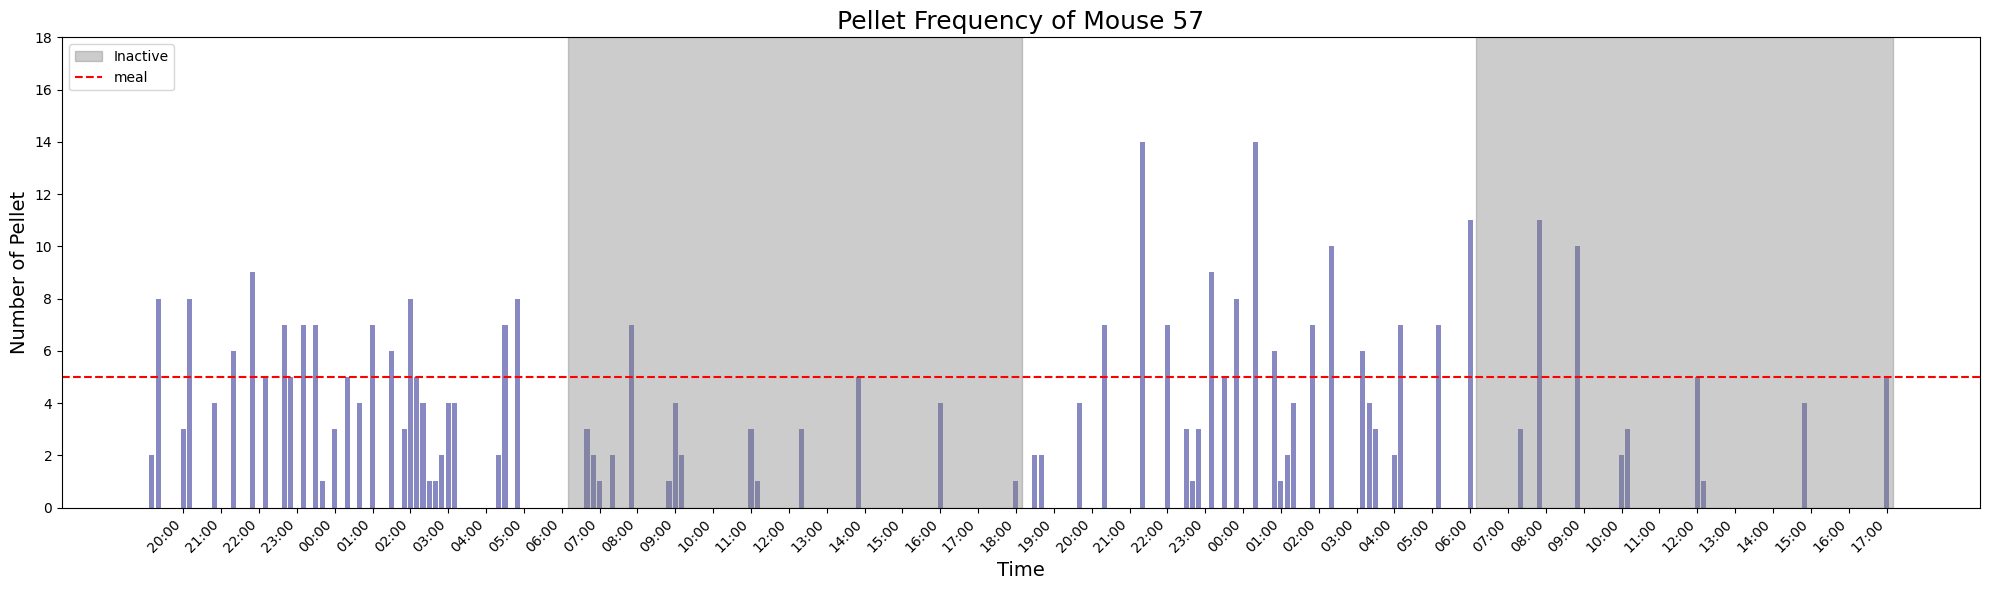

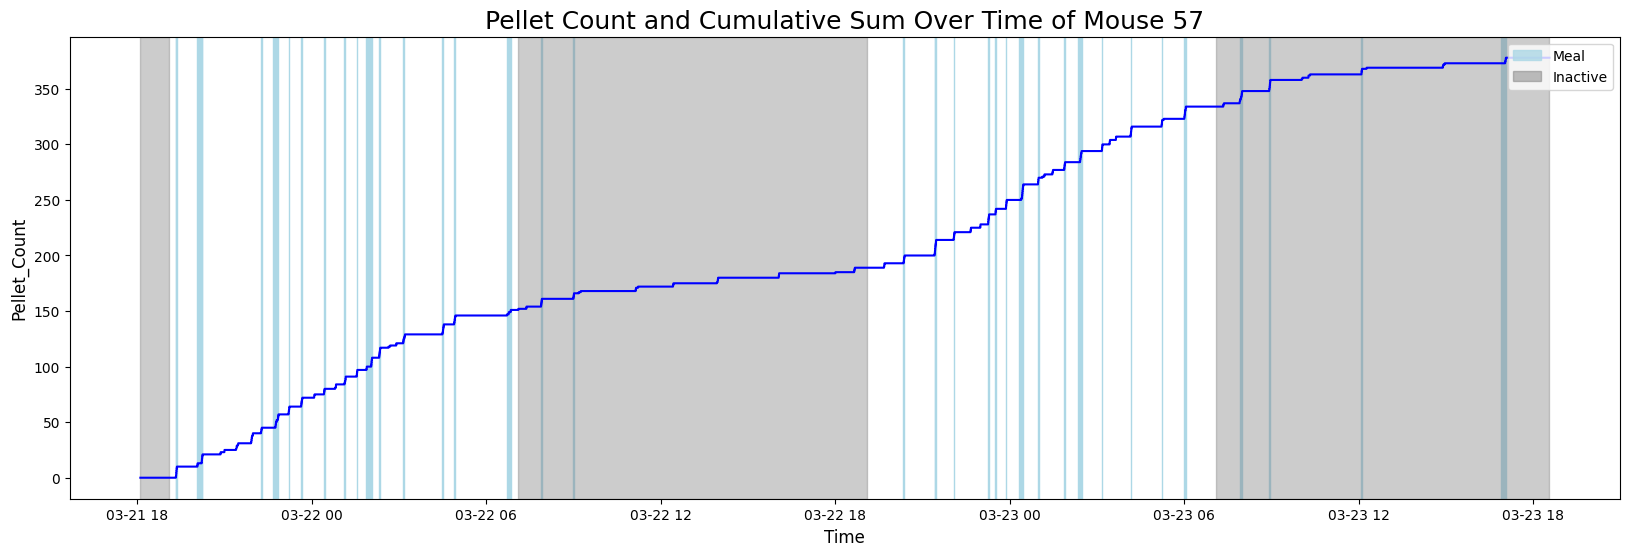

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/56/Reversal/FED000_032124_02.CSV


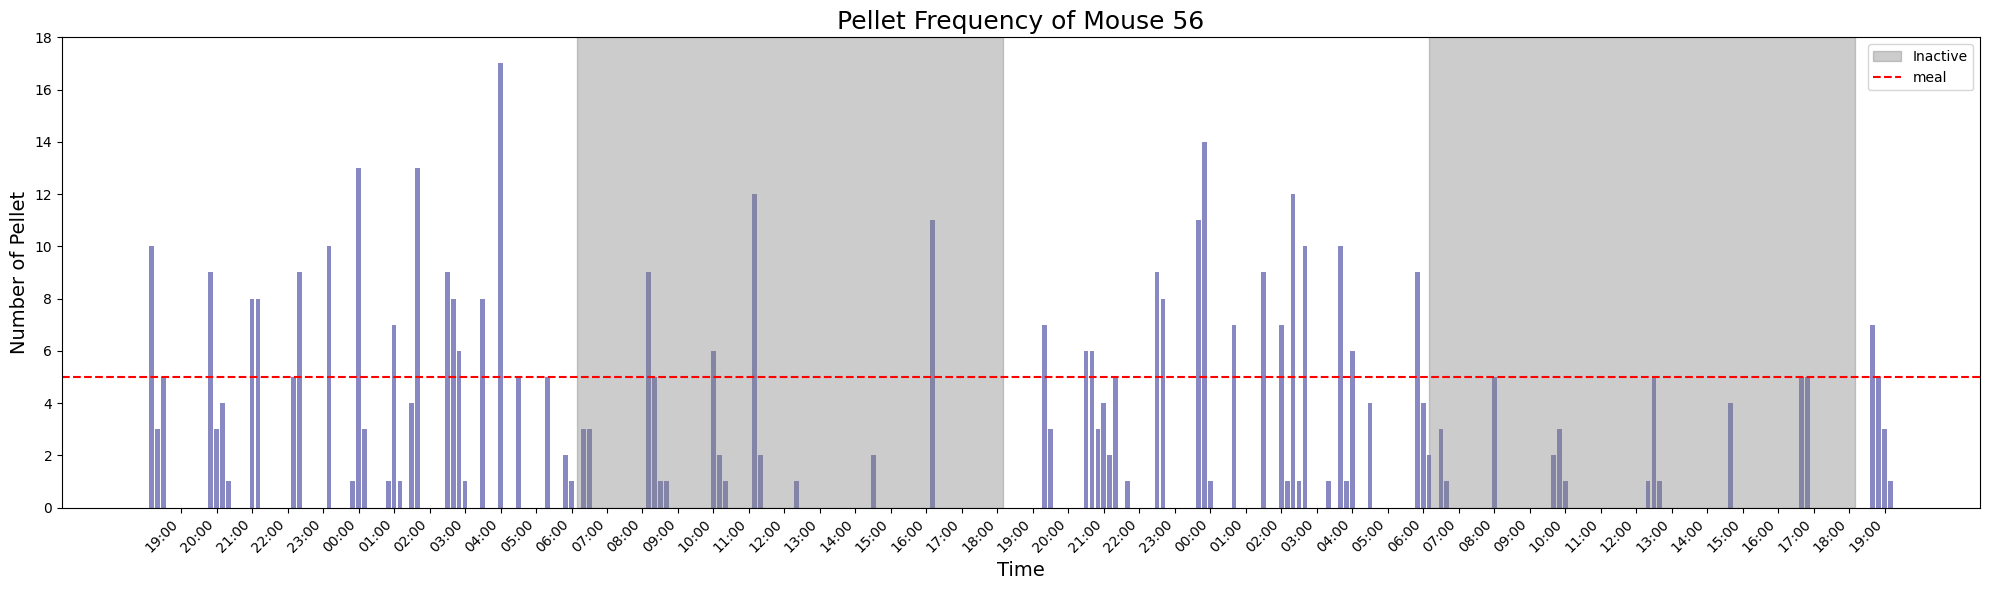

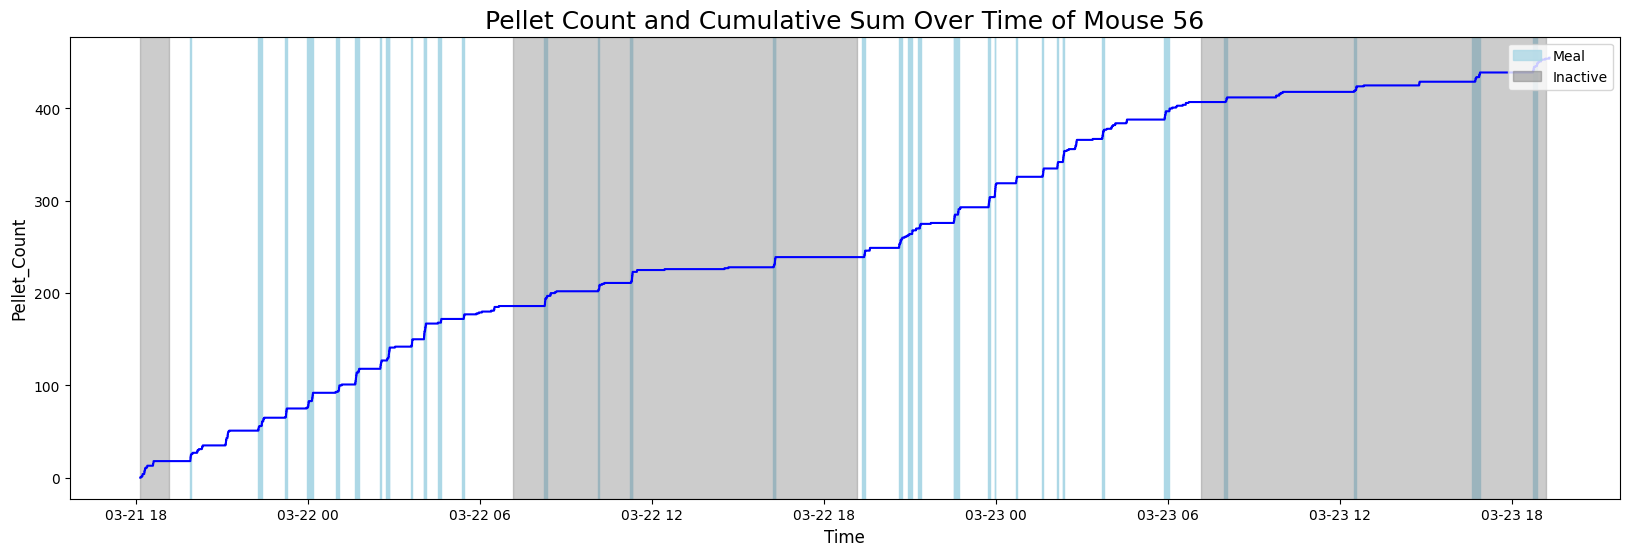

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/54/Reversal/FED000_032124_07.CSV


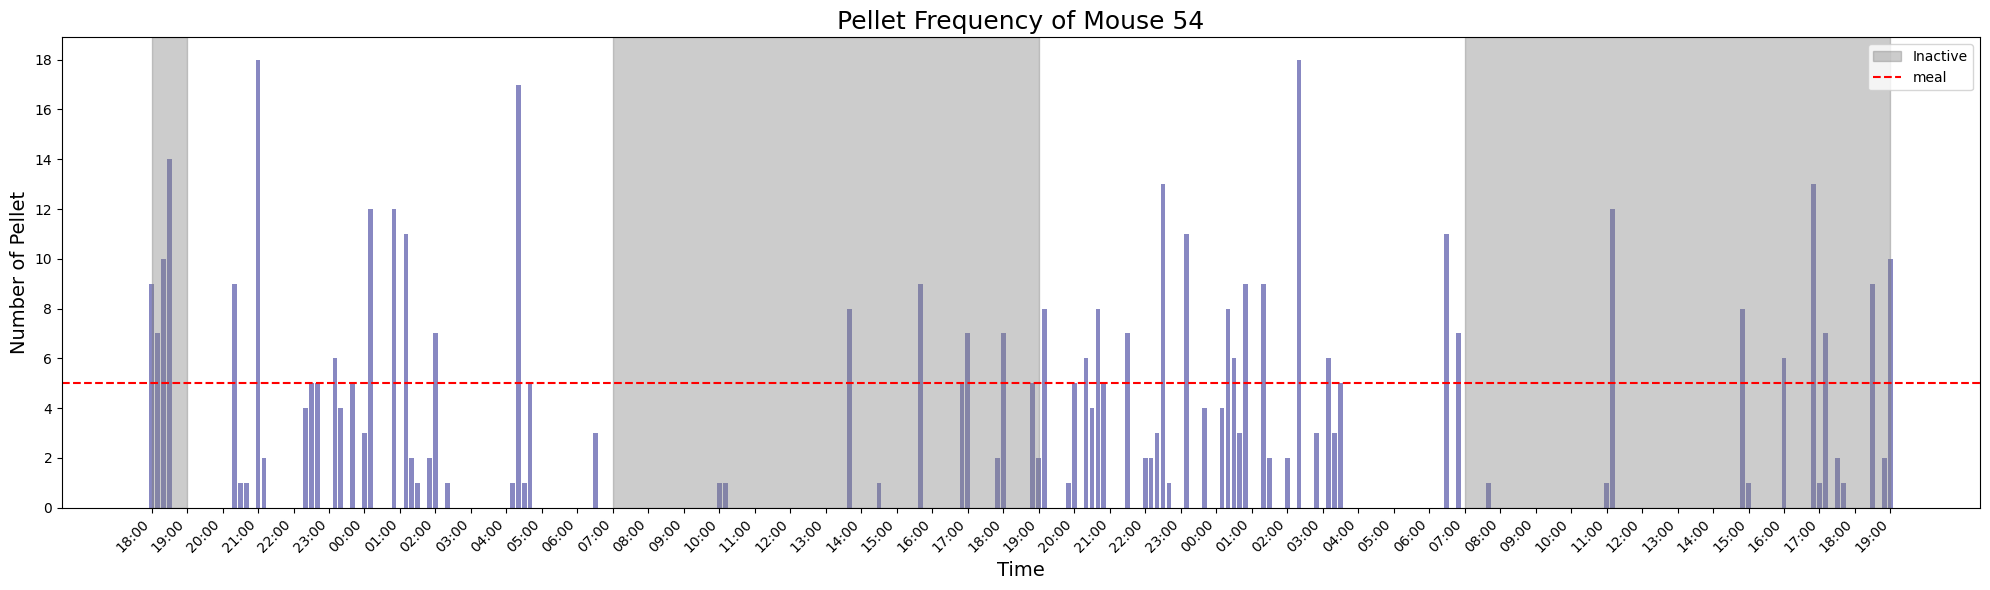

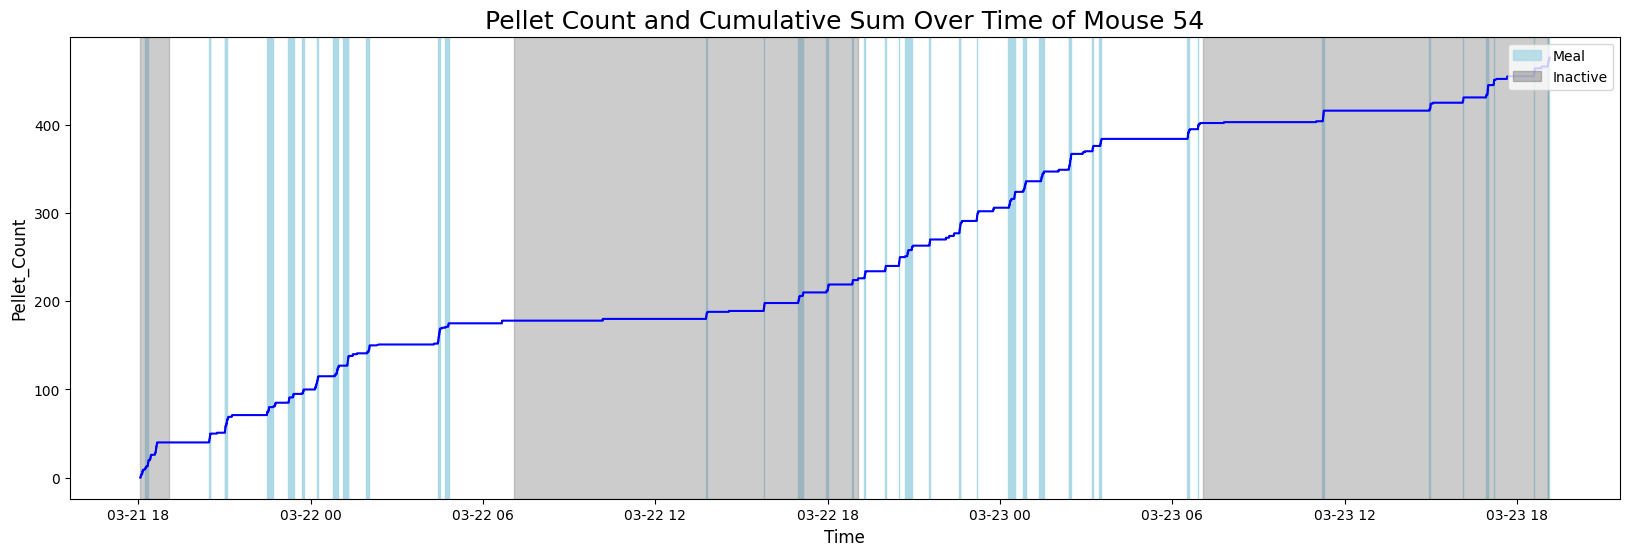

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/55/Reversal/FED000_032124_04.CSV


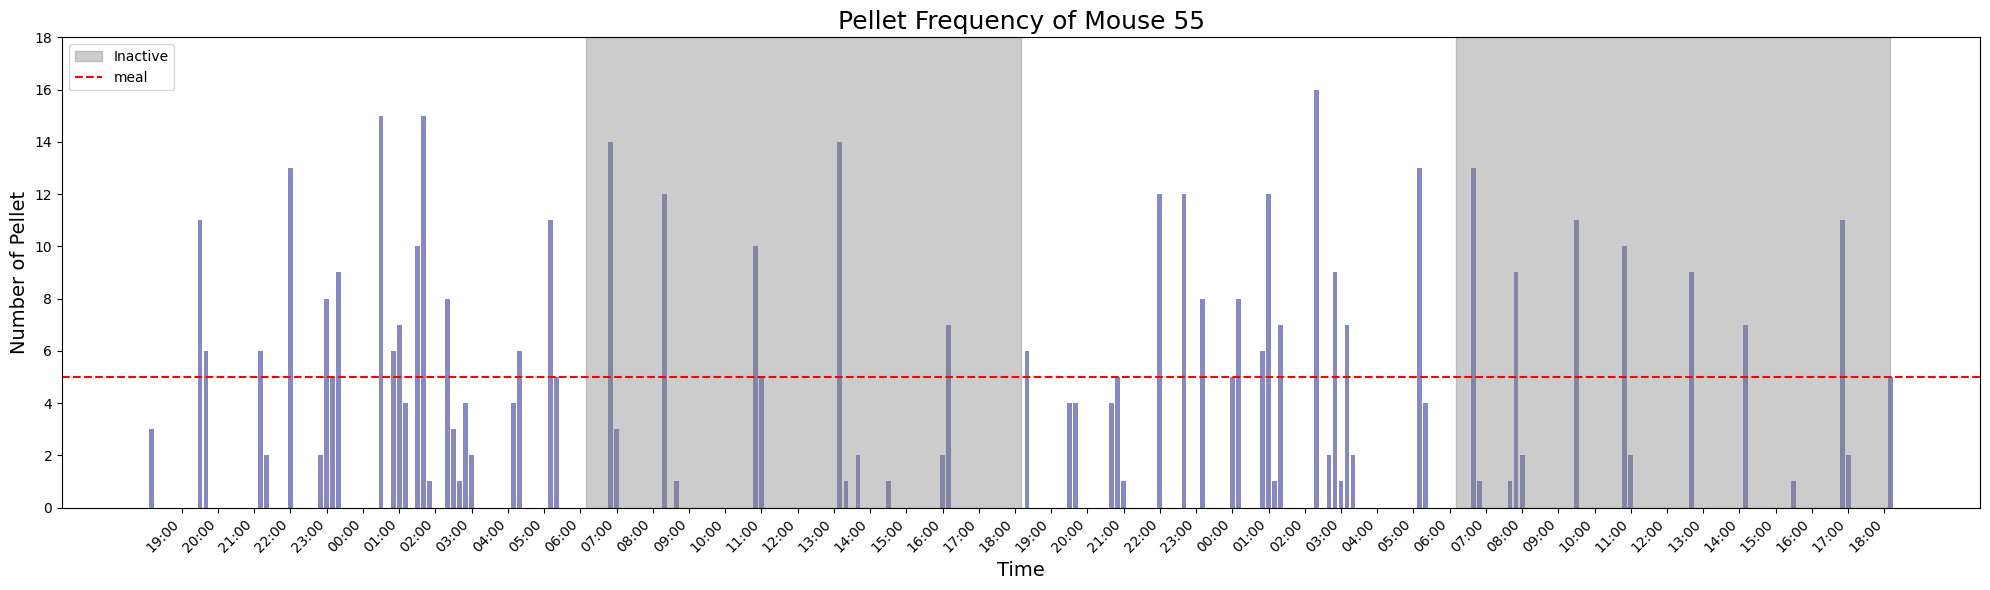

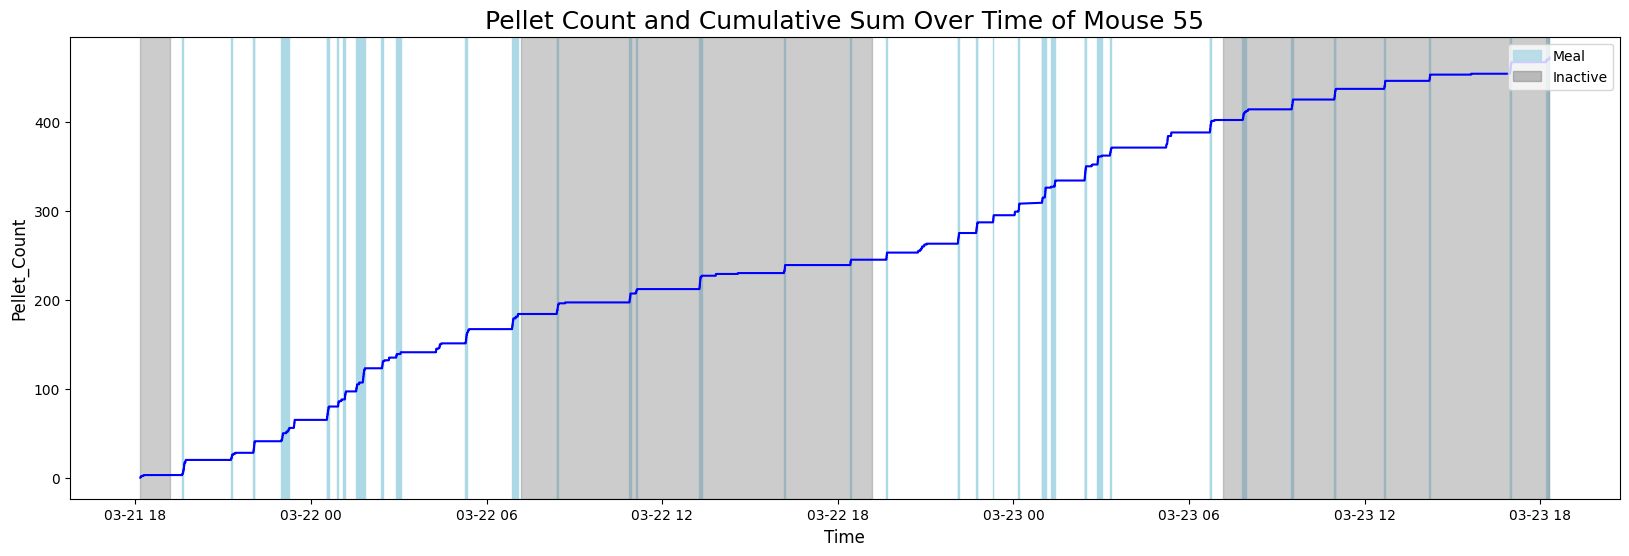

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/46/Reversal/FED000_032224_03.CSV


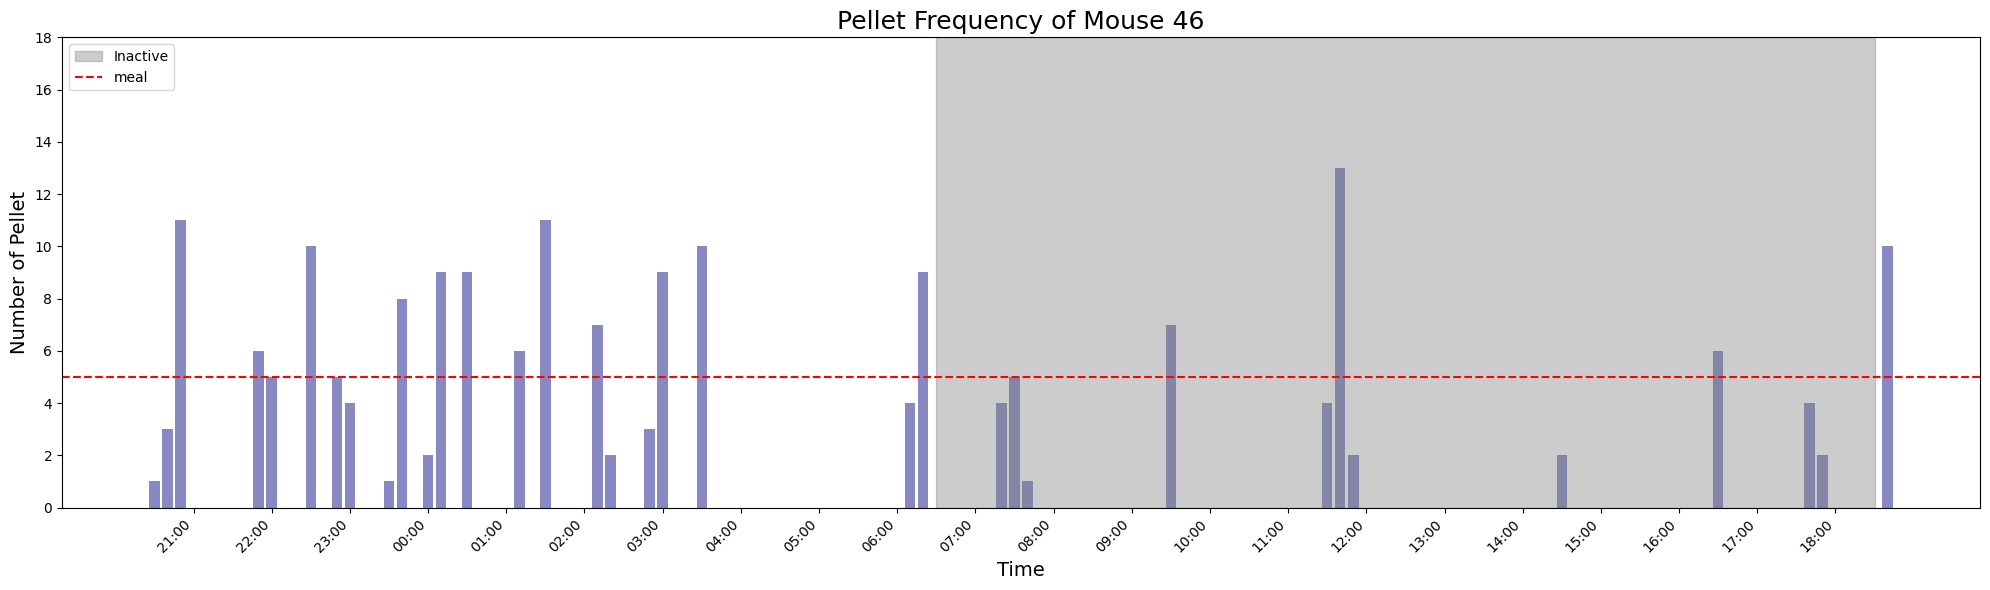

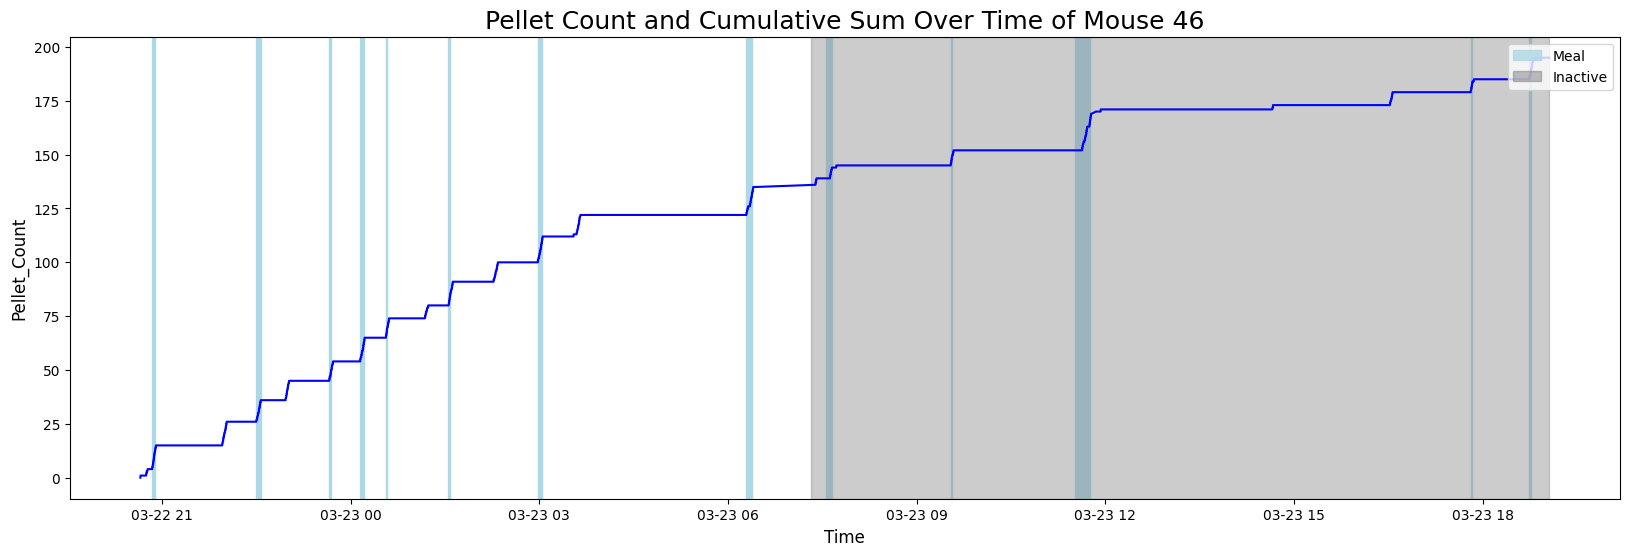

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/49/Reversal/FED000_032124_05.CSV


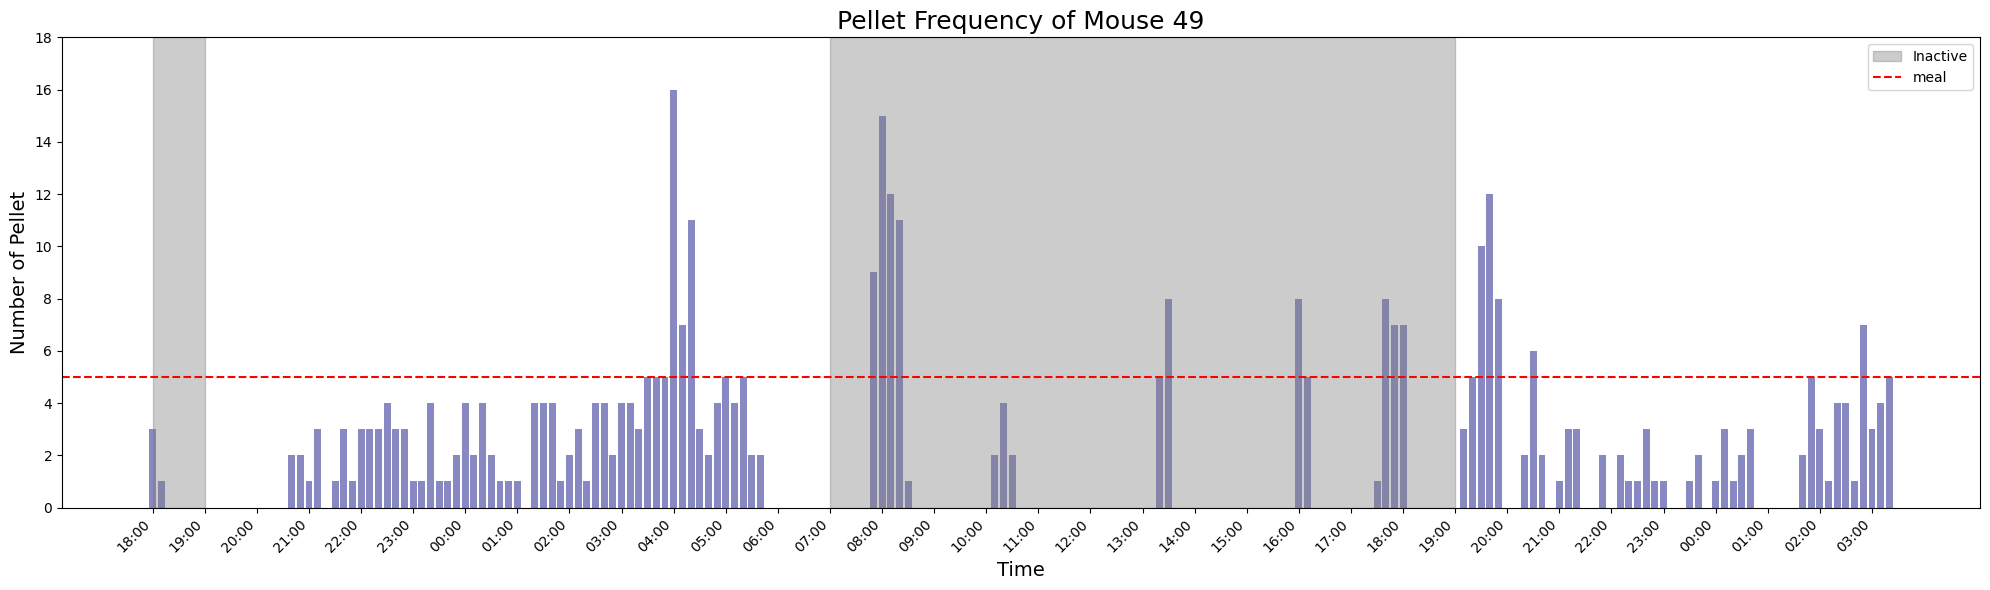

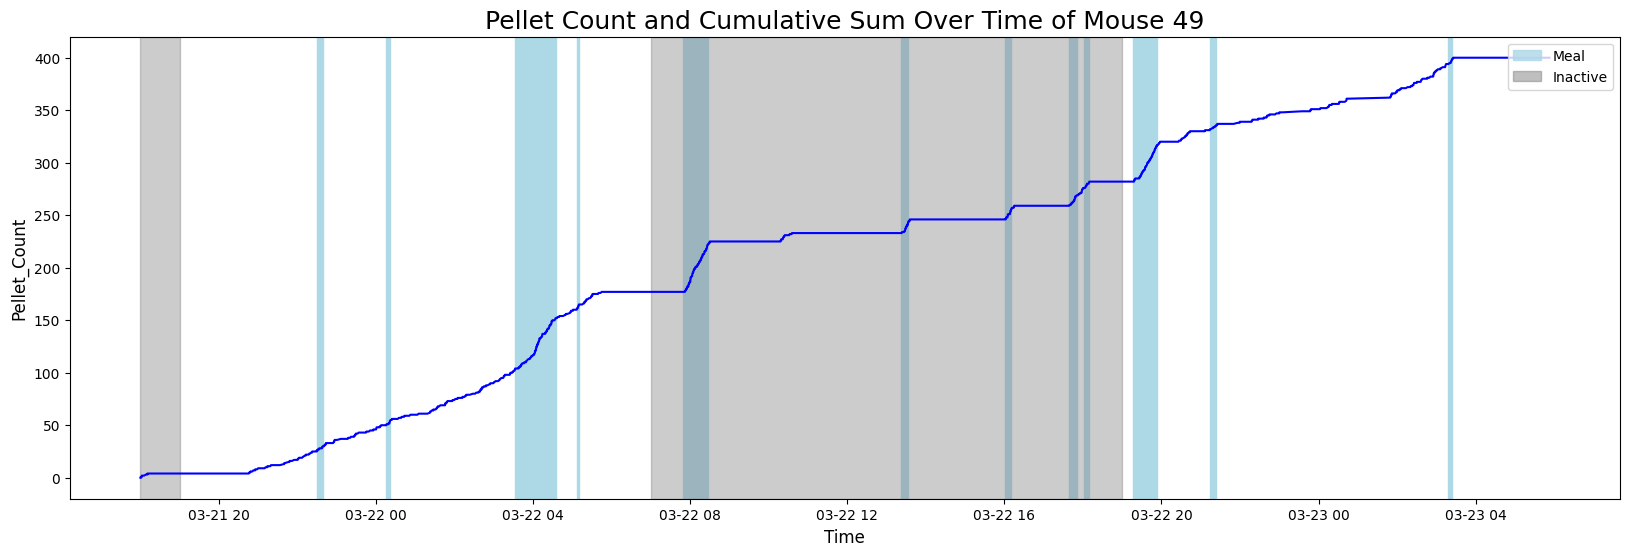

/Users/yaomingyang/Desktop/FED3-data/behavior data integrated/CD1 IVSA/47/Reversal/FED000_032124_02.CSV


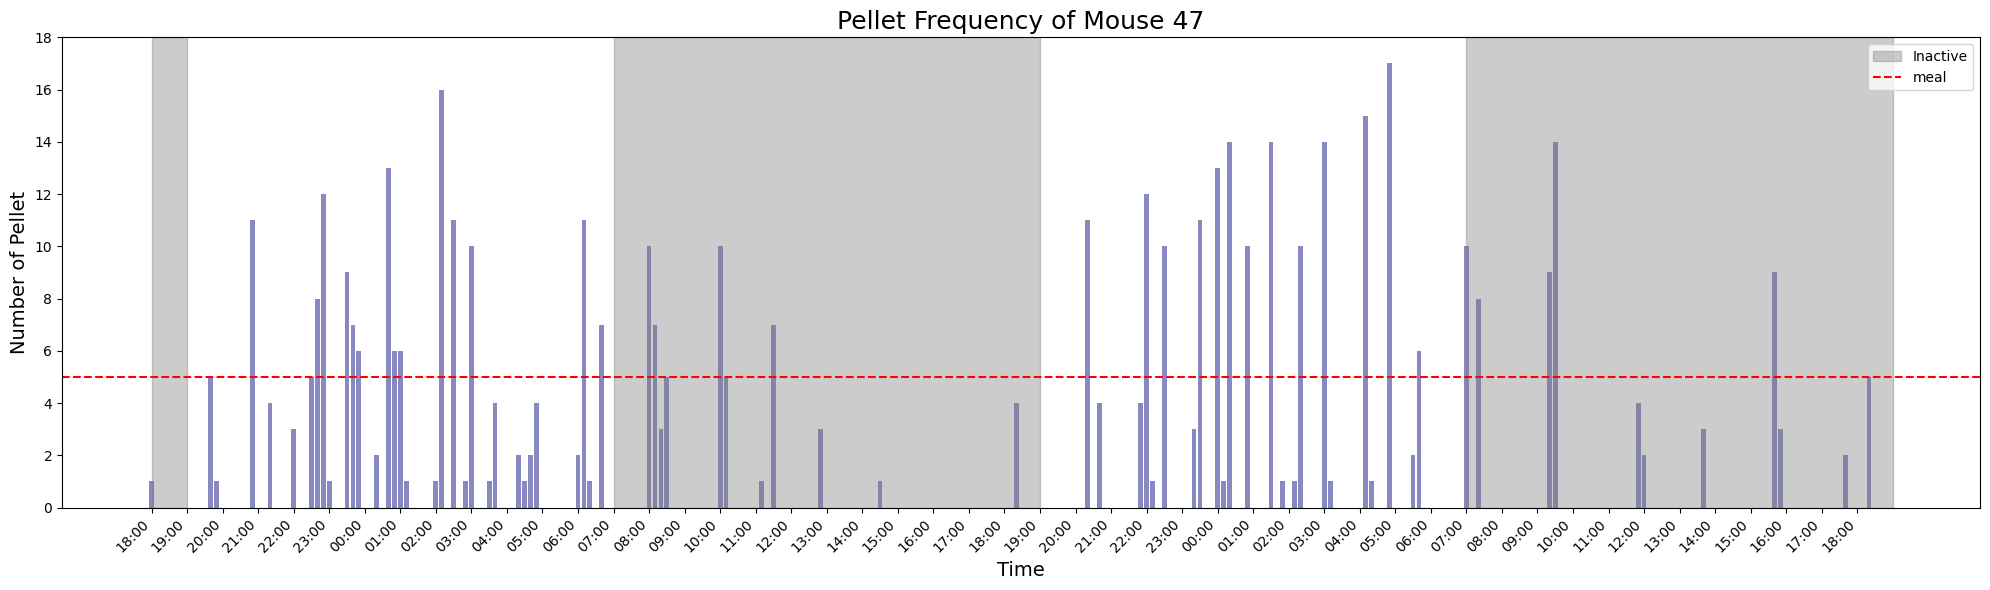

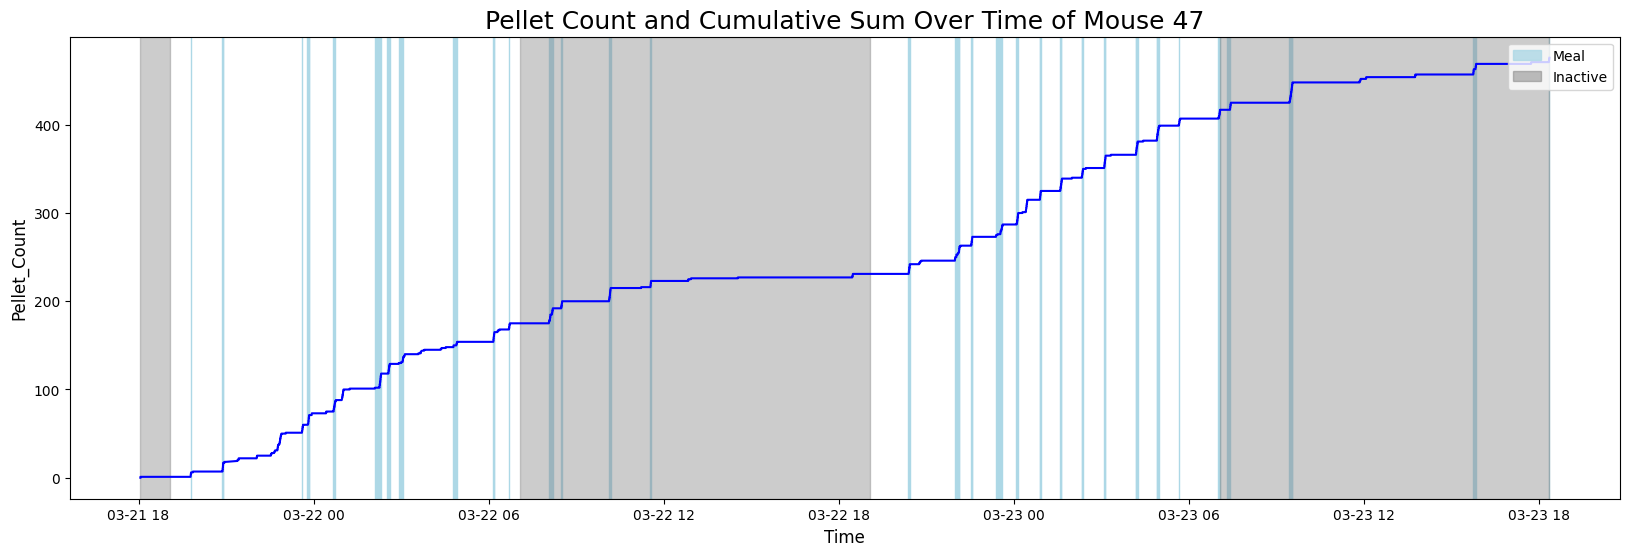

In [3]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
exp_fir_meal = []
exp_meal_count = []

for path in paths.reversal_ivsa_exp:
    print(path)
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    exp_meal_count.append(avg)
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    exp_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [4]:
ctrl_avg_pellet, exp_avg_pellet

([6.628, 8.959, 8.651, 9.363, 7.966, 7.397],
 [8.247, 9.286, 9.714, 9.833, 8.797, 12.0, 9.848])

In [12]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals)

P Value is  0.4599327267418618
There is no significant difference between the two groups.


In [11]:
ctrl_meal_count, exp_meal_count

([20.9, 30.83, 27.14, 35.34, 23.91, 21.19],
 [21.79, 26.86, 29.84, 31.9, 21.43, 25.43, 30.81])

#### Meal Count

In [6]:
invs.perform_T_test(ctrl_meal_count, exp_meal_count)

P Value is  0.9114505733059184
There is no significant difference between the two groups.


#### Average Pellet

In [7]:
invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.016484671801691175
Experiment group is significantly greater than control group


Control Size: 6
PICA Size: 7
Control Average: 8.160666666666666
PICA Average: 9.674999999999999
Control Standard Deviation: 1.028933169193542
PICA Standard Deviation: 1.184864830546787


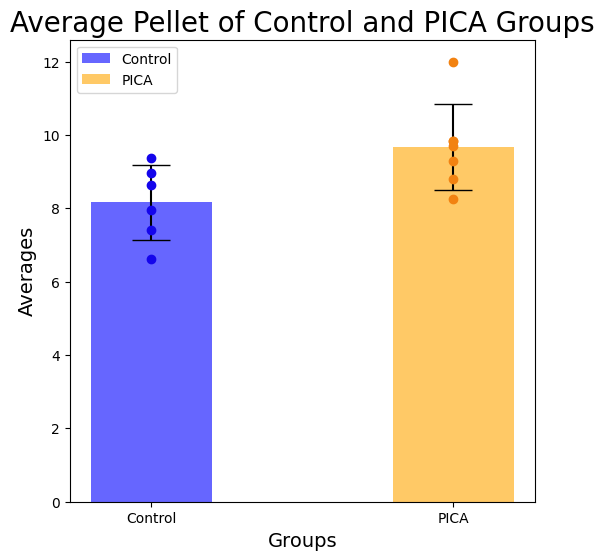

In [8]:
ml.graph_group_stats(ctrl_avg_pellet, exp_avg_pellet, stats_name='Average Pellet', exp_name='PICA')

#### First Meal Time

In [9]:
invs.perform_T_test(ctrl_fir_meal, exp_fir_meal)

P Value is  0.5231413707505108
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 68.27499999999999
PICA Average: 93.78571428571429
Control Standard Deviation: 39.7295562382578
PICA Standard Deviation: 86.87484475263051


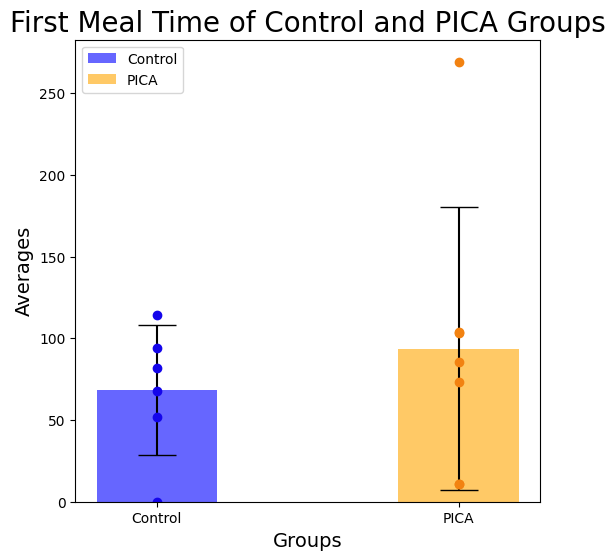

In [10]:
ml.graph_group_stats(ctrl_fir_meal, exp_fir_meal, stats_name='First Meal Time', exp_name='PICA')